In [1]:
import numpy
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0
tensorboard2.1.1
seaborn0.10.1
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5160563488240266376,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6586313605
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6302235385118563275
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:3a:00.0, compute capability: 7.5"]

In [2]:
# !pip install tensorflow-gpu==2.1.0

In [3]:
data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')

os.listdir(test_path)

['cats', 'dogs']

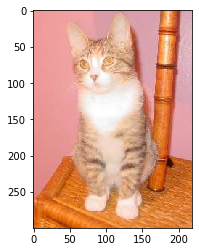

In [4]:
cat_image = test_path + '/cats/' + os.listdir(test_path + '/cats')[6]
imread(cat_image).shape
plt.imshow(imread(cat_image))

In [5]:
image_shape =(300, 300, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical',  shuffle=False)
test_image_gen.class_indices

Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [6]:
# help(test_gen.flow_from_directory)

In [7]:
model =tf.keras.models.load_model('catsdogs_categorical_h.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
[0.6699901354789733, 0.5825525907993316, 0.5319966896533966, 0.491018368434906, 0.4603659609556198, 0.4356638982057571, 0.42147822988033296, 0.3999974102973938, 0.38874320623874653, 0.3717889773607254, 0.3622361328363419, 0.35179286630153656, 0.33858211410045624, 0.3274523614287376, 0.3224239546179771, 0.31511479105949397, 0.3100462628245353, 0.2987843676924706, 0.2910706451058388, 0.2910827147960663, 0.2808720485091209, 0.2779920657515526, 0.27067878420352937, 0.2657056541562081, 0.2599110120534897, 0.2541572417199612, 0.2503348047852516, 0.24859225407838825, 0.2367907618045807, 0.2373765869379044, 0.22622413091659546, 0.2306324466049671, 0.22410181114673614, 0.22330042662620544, 0.2176937913924456, 0.21390642795562745, 0.2118949812948704, 0.21003161085247996, 0.20570255632400514,

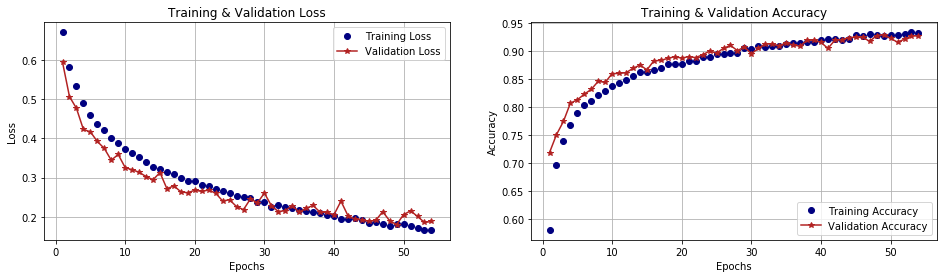

In [8]:
history = pd.read_csv("history_catsdogs_categorical_h.csv")
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [ ]:
help(lime)


In [9]:
pred = model.predict(test_image_gen)
predictions=[]
for values in pred:
    predictions.append(numpy.where(values == numpy.amax(values))[0][0])

In [10]:
# predictions = pred > 0.5
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions, target_names=test_image_gen.class_indices))

              precision    recall  f1-score   support

        cats       0.92      0.94      0.93      2500
        dogs       0.94      0.92      0.93      2500

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [11]:
pred

array([[9.9996221e-01, 3.7846861e-05],
       [9.9991262e-01, 8.7363595e-05],
       [9.8054618e-01, 1.9453855e-02],
       ...,
       [1.6648546e-02, 9.8335141e-01],
       [4.6324453e-06, 9.9999535e-01],
       [7.4943531e-01, 2.5056463e-01]], dtype=float32)

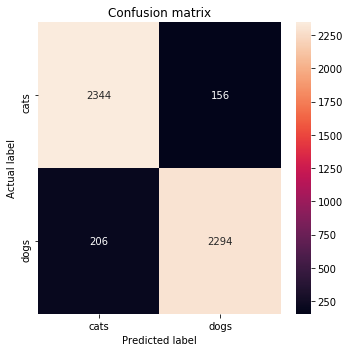

In [12]:

kr.plot_cm_categorical(test_image_gen.classes, predictions, test_image_gen.class_indices)

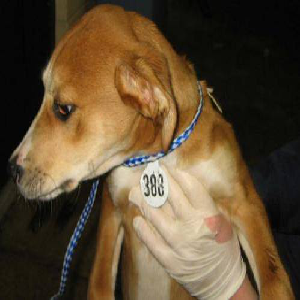

In [13]:
from tensorflow.keras.preprocessing import image
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[5]
# plt.imshow(imread(dog_image))
my_image = image.load_img(dog_image_path, target_size=image_shape)
my_image

In [14]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

(1, 300, 300, 3)

In [15]:
model.predict(my_img_arr)

array([[0., 1.]], dtype=float32)

In [16]:
model.input.shape

TensorShape([None, 300, 300, 3])

In [17]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (4, 4, 3, 32)
conv2d_1 (4, 4, 32, 32)
conv2d_2 (4, 4, 32, 64)


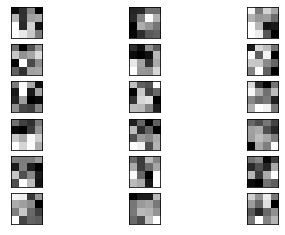

In [18]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

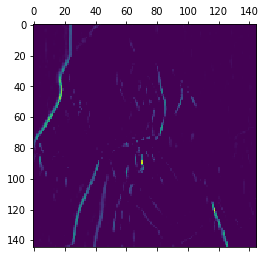

In [19]:
from tensorflow.keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.inputs, outputs=model.layers[2].output)

# returns a list of Numpy arrays: one array per layer activation
feature_maps  = activation_model.predict(my_img_arr)

# activation of the 1st convolution layer
first_layer_activation = feature_maps[0]

# # display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(feature_maps[0, :, :, 1], cmap='viridis')

In [20]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
Total params: 17,984
Trainable params: 17,984
Non-trainable params: 0
_________________________________________________________________


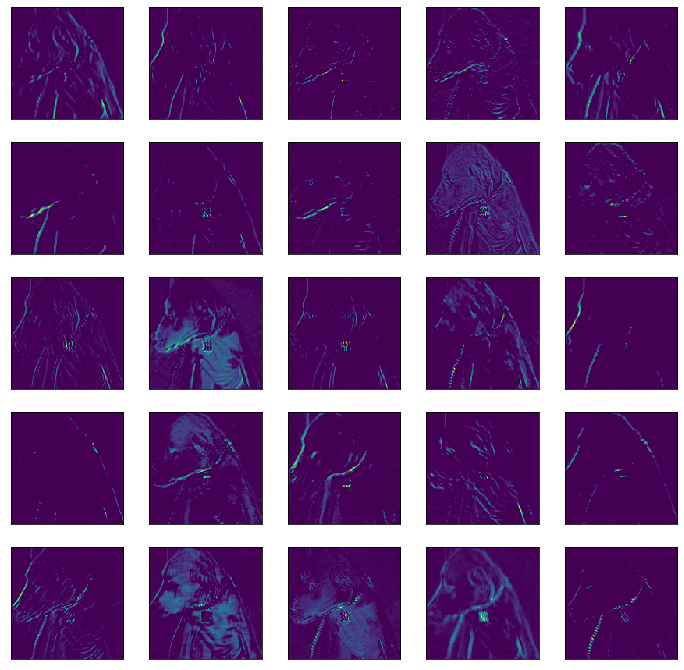

In [21]:

# plot all 64 maps in an 8x8 squares
square = 5
ix = 1
plt.figure(figsize=(12,12))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure

plt.show()

In [22]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions 
resnet = tf.keras.applications.ResNet152()


[[('n02093647', 'Bedlington_terrier', 0.23358184), ('n02091831', 'Saluki', 0.1663286), ('n03958227', 'plastic_bag', 0.11871152), ('n02088094', 'Afghan_hound', 0.07883016), ('n03803284', 'muzzle', 0.065154284)]]
Predicted: Bedlington_terrier


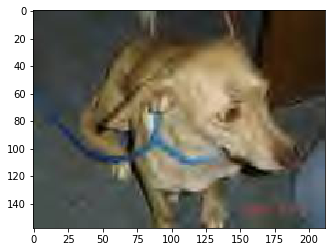

In [23]:
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[2000]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)
sample_img_arr = np.expand_dims(sample_img_arr, axis =0)
predictions = resnet.predict(sample_img_arr)
print(decode_predictions(predictions))
print('Predicted:', decode_predictions(predictions, top=3)[0][0][1])

In [24]:
print(predictions)

[[1.31086824e-06 2.02838783e-05 2.63529529e-07 8.84396513e-07
  1.14589049e-07 1.97089263e-04 9.05050797e-07 2.55429768e-06
  9.20865205e-07 2.44569732e-04 1.36519040e-04 5.72768784e-07
  5.36481650e-07 1.87029013e-06 1.27627754e-06 3.07944060e-06
  2.25577674e-06 4.78075162e-06 2.14056016e-07 4.49274103e-06
  4.52930635e-07 4.17938872e-06 8.01562621e-08 1.15332041e-05
  4.68232059e-07 7.19429423e-08 3.06845618e-06 4.38368716e-07
  2.89431398e-07 6.12328768e-06 8.48756301e-08 2.19944766e-07
  2.64631740e-06 8.49725325e-07 6.19399884e-07 1.41156249e-07
  1.44514979e-05 5.02293460e-08 7.83637734e-06 1.86293289e-06
  3.34194084e-07 2.57917109e-05 3.24966004e-06 6.84170402e-04
  5.78563345e-07 1.72452565e-06 1.05697552e-07 1.08955610e-04
  3.20835966e-06 5.97640962e-07 2.64404576e-07 1.13520771e-02
  7.26413589e-07 9.32882983e-07 4.67171185e-06 9.83846107e-08
  4.80383591e-08 3.23773037e-07 9.40312219e-08 1.32223111e-04
  3.38073605e-08 4.35281379e-07 7.99247937e-05 6.23811275e-06
  7.3792

In [25]:
sum(predictions[0])

0.9999999932525958

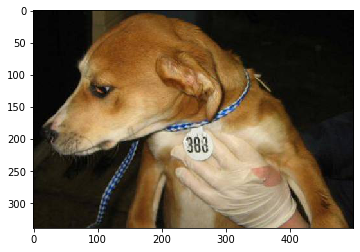

In [26]:
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[5]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=image_shape)
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)
test_gen.standardize(sample_img_arr)

import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(sample_img_arr, model.predict)

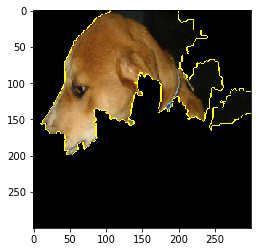

In [27]:
from skimage.segmentation import mark_boundaries
# Get image and mask shows us the superpixels that the model found to be
# most relevant to making a prediction
# The argument with the value of 1 in this method is the class that we want LIME to explain
# temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, num_features = 5)
temp, mask = explanation.get_image_and_mask( explanation.top_labels[0] , positive_only=True, 
                                            negative_only=False, hide_rest=True, num_features = 10)

plt.imshow((mark_boundaries(temp , mask)))


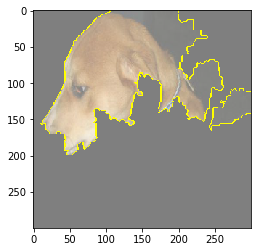

In [28]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))